
# Two Important Ratio - Squared Sensitivity on Sample Size
* `Standard deviation to baseline ratio reflects the underlying data's signal-to-noise ratio and gives insigh`t into the relative variability versus the effect size.
* `MDE relative to baseline` defines the effect size you're trying to detect, and it directly impacts the sample size.
* Sample size is determined by these two factors: the effect size (MDE relative to baseline) and the variability (standard deviation) in the data. A larger effect size or smaller variability typically leads to a smaller sample size, while smaller effect sizes or larger variability require larger sample sizes.

In [49]:
# Sensitivity : square 
std_to_base_ratio = 10
mde_relative = 0.02

def get_sample_size(std_to_base_ratio, mde_relative):
    base_val  = 100
    std = base_val*std_to_base_ratio

    size_a = calculate_sample_size(baseline_metric = base_val, mde_relative = mde_relative, metric_type='continuous', 
                        variance=std*std)
    return size_a
size_a = get_sample_size(std_to_base_ratio,mde_relative)
size_b = get_sample_size(std_to_base_ratio/3,mde_relative)
size_c = get_sample_size(std_to_base_ratio,mde_relative/3)


size_b/size_a, size_c/size_a

(0.11111113942371395, 8.999999745186575)

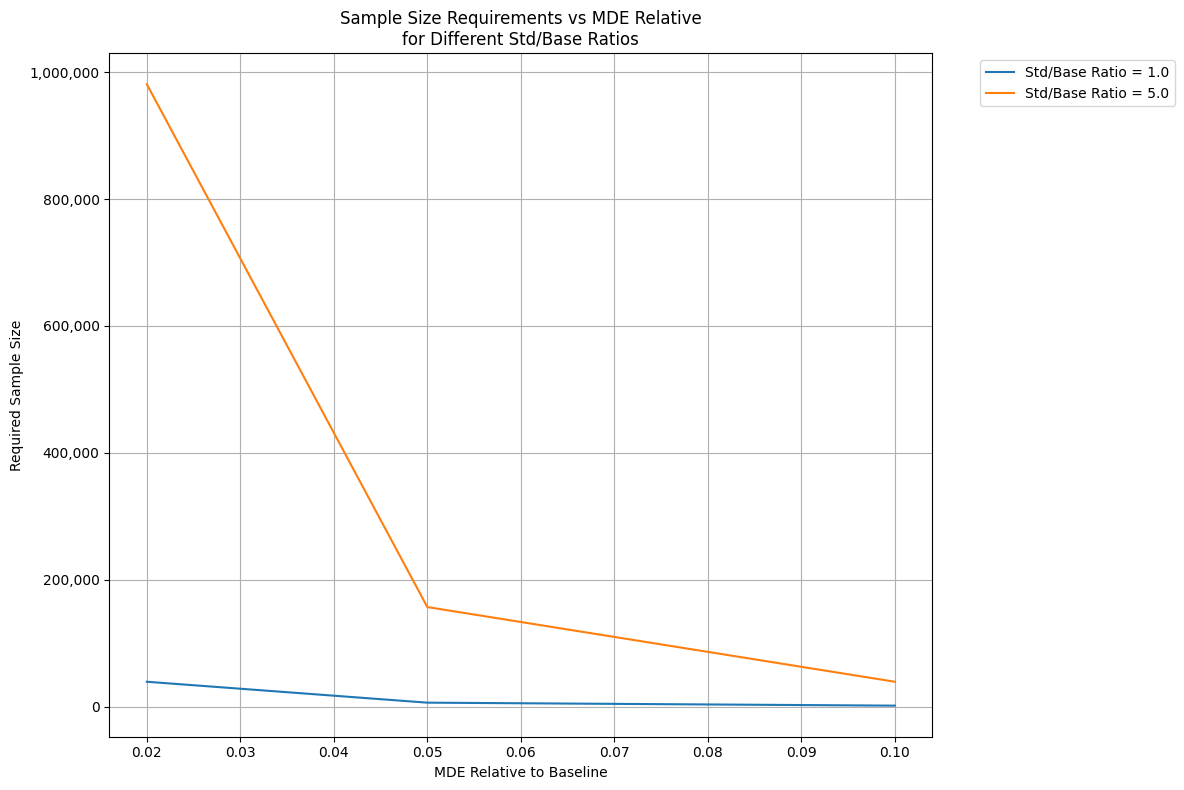

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Create ranges for parameters
mde_relative_range = [0.02, 0.05, 0.1]
std_to_base_range = [1, 5]

# Initialize matrix to store results
sample_sizes = np.zeros((len(std_to_base_range), len(mde_relative_range)))

base_val = 100

# Calculate sample sizes for each combination
for i, std_ratio in enumerate(std_to_base_range):
    for j, mde in enumerate(mde_relative_range):
        std = base_val * std_ratio
        sample_size = calculate_sample_size(baseline_metric=base_val, 
                                         mde_relative=mde,
                                         metric_type='continuous',
                                         variance=std*std)
        sample_sizes[i,j] = sample_size

# Create plot
plt.figure(figsize=(12, 8))

# Plot lines for each std_to_base_ratio
for i, std_ratio in enumerate(std_to_base_range):
    plt.plot(mde_relative_range, sample_sizes[i,:], 
             label=f'Std/Base Ratio = {std_ratio:.1f}')

plt.xlabel('MDE Relative to Baseline')
plt.ylabel('Required Sample Size')
plt.title('Sample Size Requirements vs MDE Relative\nfor Different Std/Base Ratios')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()


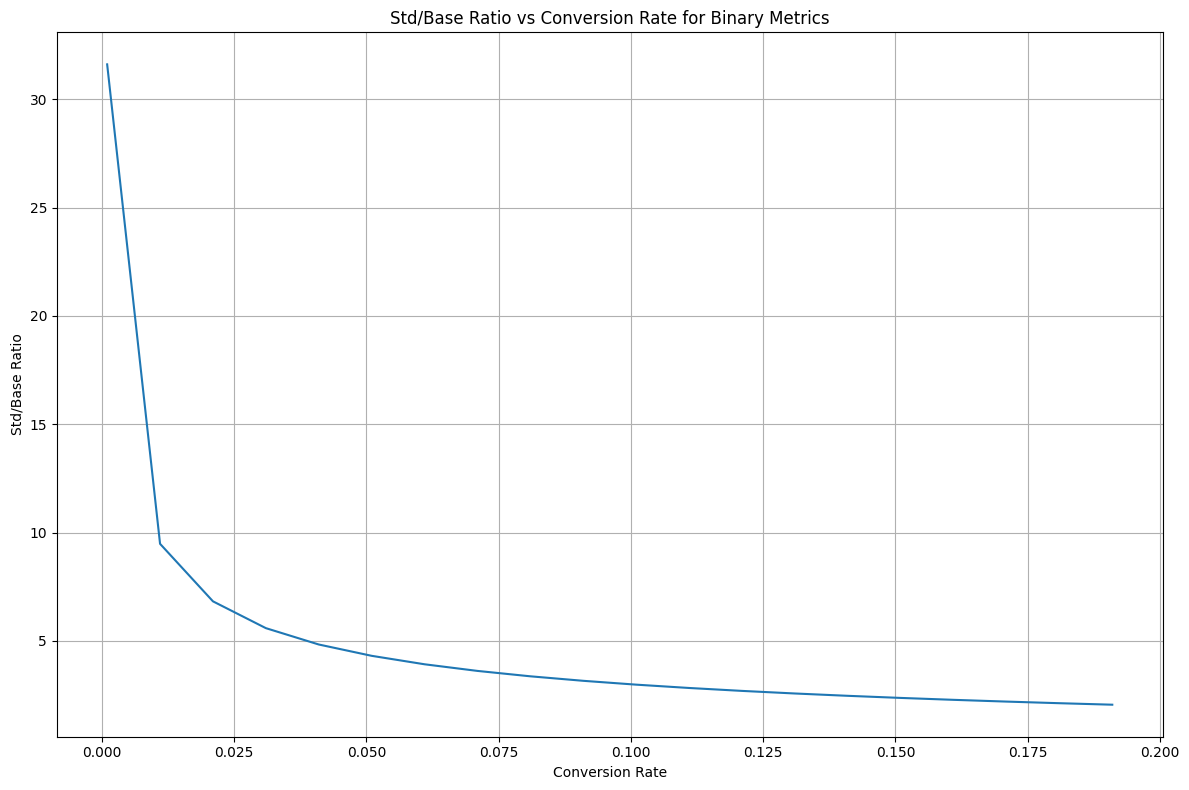

In [40]:
# Calculate std_to_base_ratio for binary metrics across different conversion rates
import numpy as np
import matplotlib.pyplot as plt

# Create range of conversion rates
conv_rates = np.arange(0.001, 0.2, 0.01)

# For binary metrics, variance = p(1-p) where p is conversion rate
# std = sqrt(p(1-p))
# std_to_base_ratio = std/base = sqrt(p(1-p))/p

std_to_base_ratios = np.sqrt(conv_rates * (1-conv_rates)) / conv_rates

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(conv_rates, std_to_base_ratios)
plt.xlabel('Conversion Rate')
plt.ylabel('Std/Base Ratio')
plt.title('Std/Base Ratio vs Conversion Rate for Binary Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#